<a href="https://www.kaggle.com/code/rautaishwarya/play-store-eda-rating-prediction-using-ann-dt?scriptVersionId=138467134" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Google Play Store Apps Data Notebook 

**This comprehensive notebook dives into the fascinating world of Google Play Store apps, providing valuable insights and analysis. By leveraging the rich dataset available, it explores key trends, app categories, ratings, reviews, and more. From uncovering popular app genres to evaluating user satisfaction, this notebook offers a deep exploration of the vast Google Play Store ecosystem. Join us on this data-driven journey to gain a deeper understanding of the app landscape and its impact on user experiences.**

# Table of Context
1. Importing Library
2. Loading Data
3. EDA
4. Data Preprocessing
5. Decision Tree
6. Ramdom Forest
7. Artifical Neural Network
8. Conclusion

# 1. Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import adam

import warnings
warnings.filterwarnings("ignore")


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# 2. Loading Data

In [2]:
df=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 3. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


We can see from the information above that there are missing data and that features' data types are not being appropriately identified. 
Right now, we must do two actions, including:
1. Handling values that are missing 
2. Change data types


In [4]:
df.shape

(10841, 13)

The data is organised into 10841 rows and 13 columns.

In [5]:
df.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

We can observe that the characteristic of rating, which is our objective feature, lacks the majority of the data.


In [6]:
df.dropna(how="any",inplace=True)

In [7]:
df.isnull().sum().sort_values(ascending=False)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

We have no missing data left after removing the missing value.


In [8]:
df.duplicated().sum()

474

We have 474 duplicate records that must be removed.


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df=df.reset_index(drop=True)

In [11]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

The data type of the "Size" feature should be int or float, but it is Object. As we see the unique values, we can notice the data entered as 'Varies with device' and each value is entered with "M" or "K". As a result, we must replace "Varies with device" with nan and delete "M" and "K" from the values.


In [12]:
df["Size"]=df["Size"].replace("Varies with device",np.nan)

In [13]:
def convert_size(size):
  if isinstance(size,str):
    value=float(re.findall(r"\d+\.*\d*",size)[0])
    unit=size[-1]
    if unit=="M":
      return value
    elif unit=="k":
      return value/1024
    raise ValueError("Invalid Size Format")

converted_sizes=[]
for size in df["Size"].tolist():
    converted_size=convert_size(size)
    converted_sizes.append(converted_size)

df["df_size_converted"] = pd.DataFrame({"Converted Size (MB)": converted_sizes})

In [14]:
df.isnull().sum()

App                     0
Category                0
Rating                  0
Reviews                 0
Size                 1468
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
df_size_converted    1468
dtype: int64

After converting, we can see that 1468 of the values are nan, which we may eliminate.


In [15]:
df.dropna(inplace=True)
df=df.reset_index(drop=True)
df.shape

(7418, 14)

In [16]:
df.shape

(7418, 14)

After deleting missing and duplicate data, the remaining data is 7418.


In [17]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'df_size_converted'],
      dtype='object')

In [18]:
print(df["Installs"].unique())
print(df["Price"].unique())

['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000+'
 '500,000,000+' '100+' '500+' '10+' '1,000,000,000+' '5+' '50+' '1+']
['0' '$4.99' '$6.99' '$7.99' '$3.99' '$5.99' '$2.99' '$1.99' '$9.99'
 '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99' '$79.99' '$16.99'
 '$14.99' '$29.99' '$12.99' '$3.49' '$10.99' '$7.49' '$1.50' '$19.99'
 '$15.99' '$33.99' '$39.99' '$2.49' '$4.49' '$1.70' '$1.49' '$3.88'
 '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61'
 '$1.59' '$6.49' '$1.29' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$8.49' '$1.75' '$14.00' '$2.00' '$3.08' '$2.59' '$19.40' '$15.46'
 '$8.99' '$3.04' '$13.99' '$4.29' '$3.28' '$4.60' '$1.00' '$2.90' '$1.97'
 '$2.56' '$1.20']


Remove the "+" and "$" signs from Installs and Price.


In [19]:
cols=["Installs","Price"]
signs=["+",",","$"]

for col in cols:
  for sign in signs:
    df[col]=df[col].apply(lambda x:x.replace(sign,""))


In [20]:
# Drop Size column
df.drop(columns="Size",inplace=True,axis=1)

In [21]:
df.head(3)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,df_size_converted
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7


In [22]:
df["Reviews"]=df["Reviews"].astype(float)
df["Installs"]=df["Installs"].astype(float)
df["Price"]=df["Price"].astype(float)
df["df_size_converted"]=df["df_size_converted"].astype(float)

**Graphical Reprentation between features**

<Figure size 500x500 with 0 Axes>

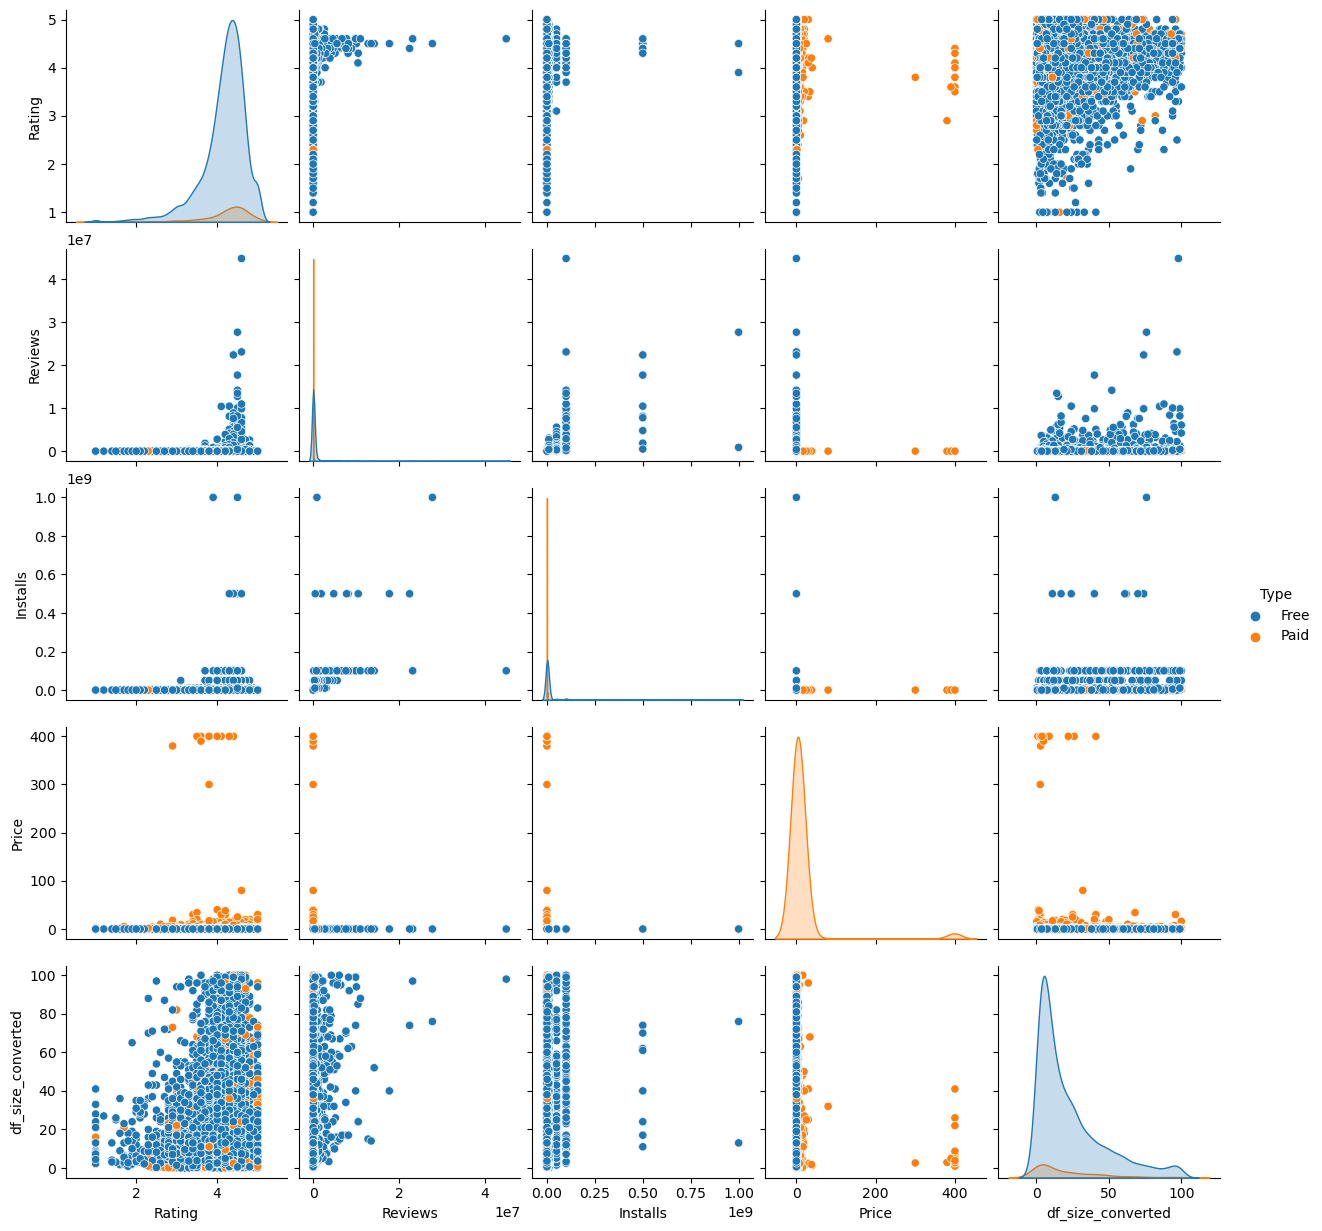

In [23]:
plt.figure(figsize=(5,5))
sns.pairplot(df,diag_kind="kde",hue="Type")
plt.show()

## Category VS Rating

Determine the rating distribution for app categories. 


In [24]:
print("Rating Distribution for Categories of App")
fig=px.pie(df,values="Rating",names="Category")
fig.show()


Rating Distribution for Categories of App


The majority of the ratings are assigned to the Family and Game categories.


## Average Rating 

In [25]:
print("Average Rating",df["Rating"].mean())
fig=px.histogram(df,x="Rating",histfunc="avg",text_auto=True)
fig.show()

Average Rating 4.1713939067134


The majority of app users rank the app between 4 and 4.8 stars. The overall rating for all apps is 4.17.


## Average Rating For Individual Category

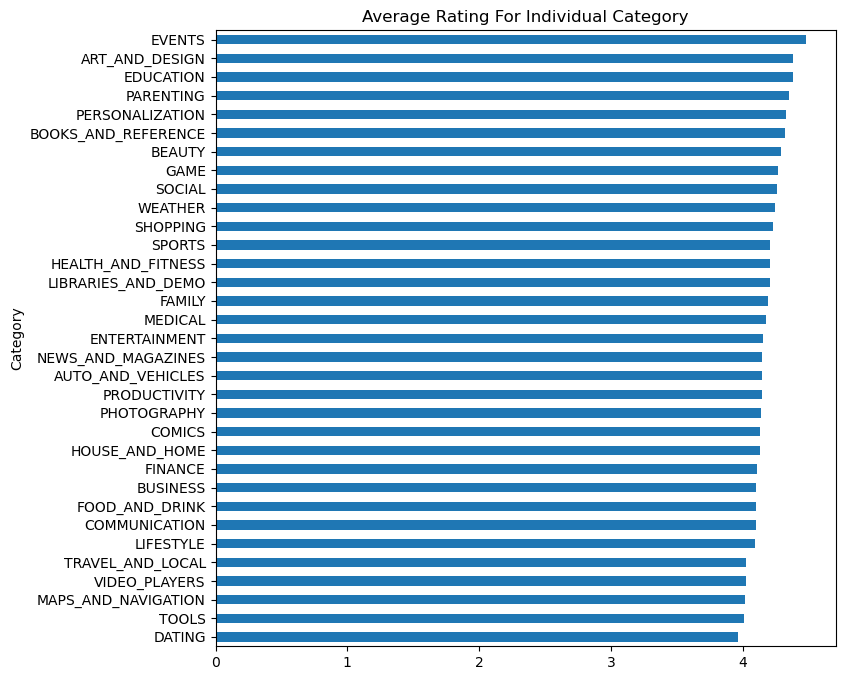

In [26]:
plt.figure(figsize=(8,8))
df.groupby("Category")["Rating"].mean().sort_values().plot(kind="barh")
plt.title("Average Rating For Individual Category")
plt.show()

The event and art & design categories have the highest ratings.


## Size of the App and Ratings

<Figure size 1000x600 with 0 Axes>

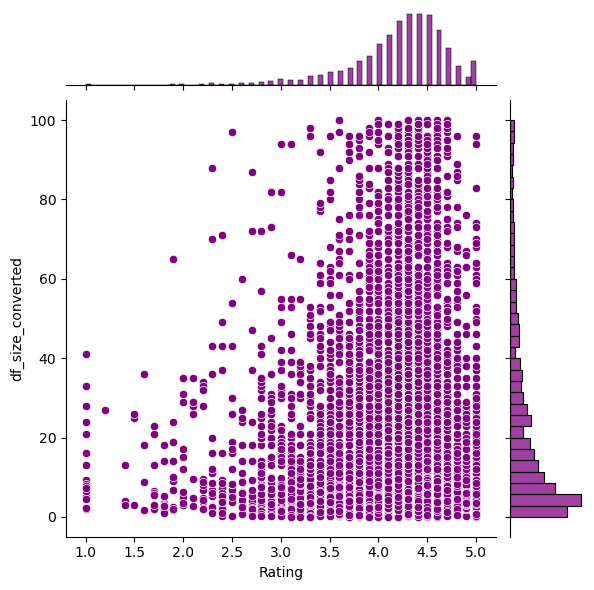

In [27]:
plt.figure(figsize=(10,6))
sns.jointplot(df,x="Rating",y="df_size_converted",color="purple")
plt.show()

App size between **10-20MB** has maximum Ratings.

## Price Vs Ratings

<Figure size 600x400 with 0 Axes>

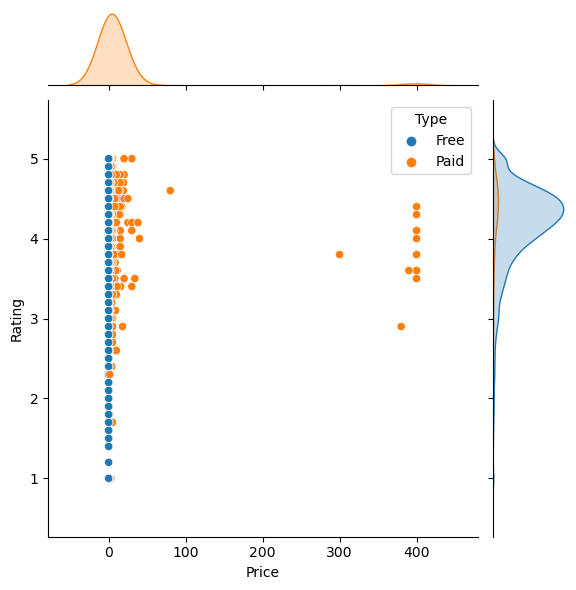

In [28]:
plt.figure(figsize=(6,4))
sns.jointplot(df,y="Rating",x="Price",color="purple",hue="Type")
plt.show()

Paid and free apps have high ratings. Surprisingly, some apps cost around $400 


The majority of the apps cost less than $100. 


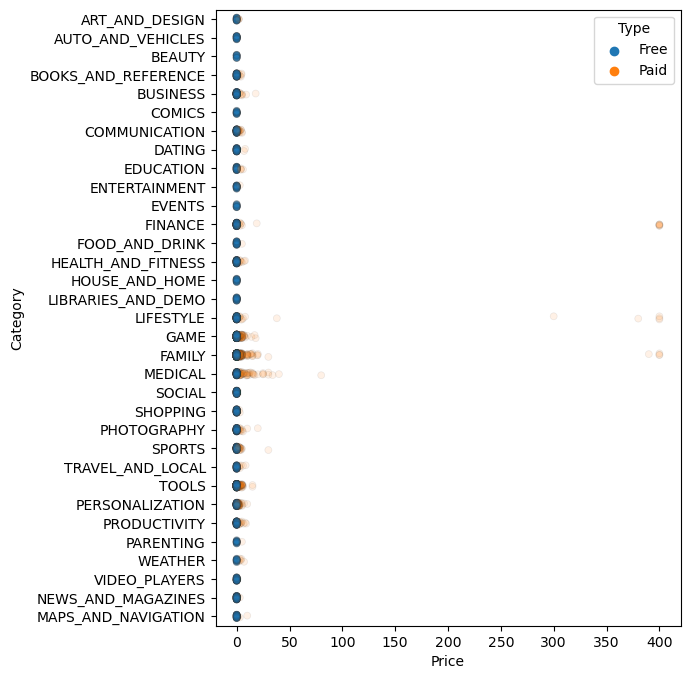

In [29]:
plt.figure(figsize=(6,8))
sns.stripplot(data=df,y="Category",x="Price",hue="Type",marker="o",s=5,linewidth=0.5, alpha=.1)
plt.show()

As we can see, the majority of ratings are in the "Game," "Medical," and "Family" app categories. and some of the apps in this category are quite expensive.


In [30]:
[df["Price"]>250]

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 7413    False
 7414    False
 7415    False
 7416    False
 7417    False
 Name: Price, Length: 7418, dtype: bool]

As seen in the app feature. We can recognise that an app that costs more than $250 is too pricey.


For the time being,let's just concentrate on the Price. So we choose a data-only paid app that costs less than $250.


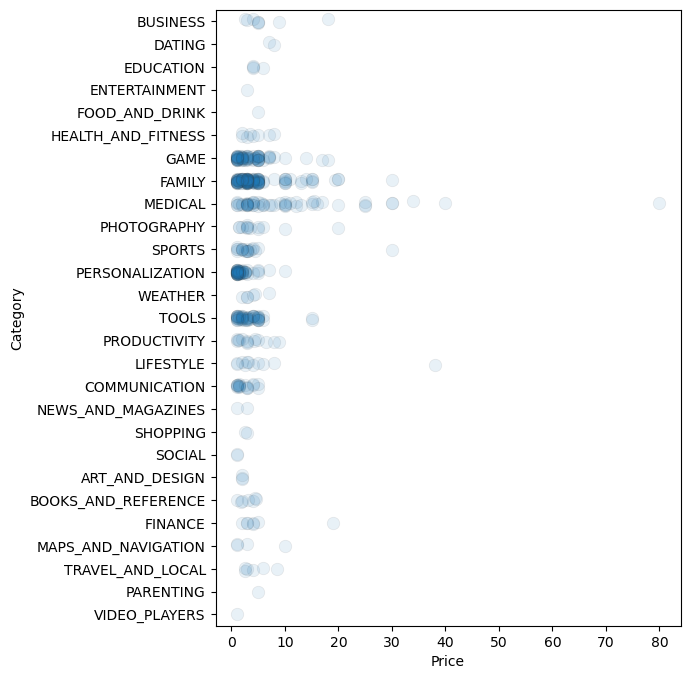

In [31]:
df_price_250=df[(df["Price"]<250) & (df["Price"]>0)]
plt.figure(figsize=(6,8))
sns.stripplot(data=df_price_250,y="Category",x="Price",marker="o",s=9,linewidth=0.5, alpha=.1)
plt.show()

The app categories "Game", "Medical", "Family", and "Tools" have the most ratings. The most costly app category is "Medical", with a maximum price of $80. $ The majority of the apps cost between $10 and $20.


## Downloads Of Paid Vs Free apps

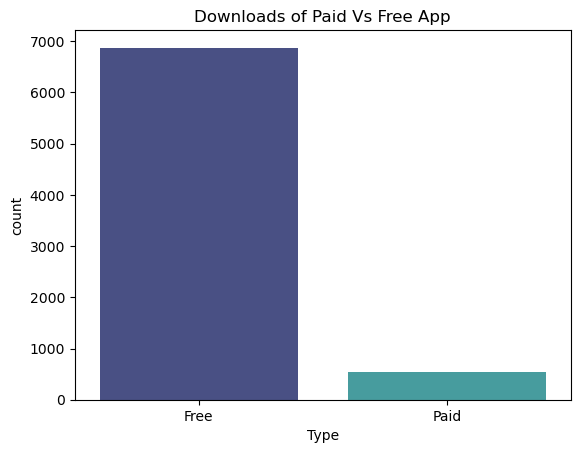

In [32]:
sns.countplot(data=df,x=df["Type"],palette="mako")
plt.title("Downloads of Paid Vs Free App")
plt.show()

The majority of customers prefer to download free apps.


Text(0.5, 1.0, 'Heatmap of data')

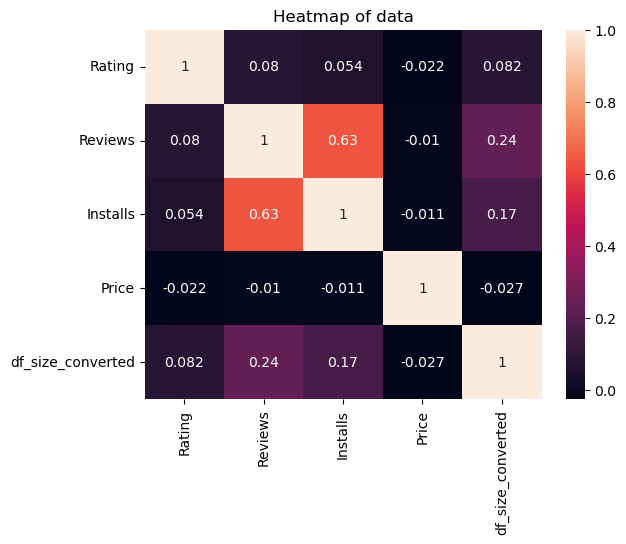

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap of data")

We can observe from the heatmap above that there is a positive correlation between installs and reviews.


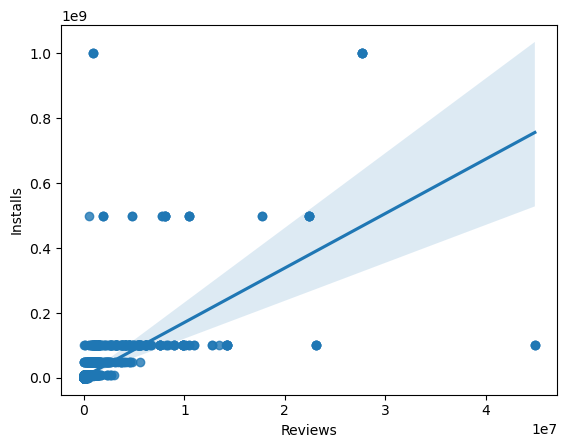

In [34]:
sns.regplot(data=df,x="Reviews",y="Installs")
plt.show()

# 4. Data Preprocessing

In [35]:
# Create Dummy variable
dummies=pd.get_dummies(df["Category"])
dummies

df_concat=pd.concat([df,dummies],axis=1)
df_concat.drop(columns=["App","Category","Content Rating","Genres","Last Updated",'Current Ver','Android Ver'],inplace=True)


In [36]:
# Label Oncoding for Type 
le=LabelEncoder()
df_concat["Type"]=le.fit_transform(df["Type"])
df_concat

,Rating,Reviews,Installs,Type,Price,df_size_converted,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159.0,10000.0,0,0.0,19.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,500000.0,0,0.0,14.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,5000000.0,0,0.0,8.700000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644.0,50000000.0,0,0.0,25.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,100000.0,0,0.0,2.800000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,4.8,44.0,1000.0,0,0.0,0.604492,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7414,4.0,7.0,500.0,0,0.0,2.600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7415,4.5,38.0,5000.0,0,0.0,53.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7416,5.0,4.0,100.0,0,0.0,3.600000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Scaling the data
df_final=scale(df_concat)
df_final=pd.DataFrame(df_final,columns=df_concat.columns)
df_final

,Rating,Reviews,Installs,Type,Price,df_size_converted,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,...,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,-0.129860,-0.159866,-0.168829,-0.281595,-0.063065,-0.160444,11.264837,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
1,-0.493645,-0.159403,-0.158250,-0.281595,-0.063065,-0.373773,11.264837,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
2,0.961495,-0.109785,-0.061099,-0.281595,-0.063065,-0.599902,11.264837,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
3,0.597710,-0.036322,0.910421,-0.281595,-0.063065,0.095551,11.264837,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
4,0.233925,-0.159403,-0.166886,-0.281595,-0.063065,-0.851631,11.264837,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7413,1.143388,-0.159932,-0.169024,-0.281595,-0.063065,-0.945304,-0.088772,-0.092551,-0.070802,7.132610,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
7414,-0.311753,-0.159953,-0.169034,-0.281595,-0.063065,-0.860164,-0.088772,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
7415,0.597710,-0.159935,-0.168937,-0.281595,-0.063065,1.290194,-0.088772,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203
7416,1.507173,-0.159955,-0.169043,-0.281595,-0.063065,-0.817498,-0.088772,-0.092551,-0.070802,-0.140201,...,-0.196952,-0.176863,-0.17928,-0.147999,-0.153149,-0.17968,-0.305441,-0.142188,-0.12604,-0.083203


In [38]:
# Split the data into train and test
x=df_final.drop(columns=["Rating"],axis=1)
y=df_final["Rating"]

x_train, x_test,y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=7)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5934, 38)
(5934,)
(1484, 38)
(1484,)


# 5. Decision Tree

In [39]:
# Full decision tree model fitting
model_1=DecisionTreeRegressor(random_state=7)
model_1.fit(x_train,y_train)

DecisionTreeRegressor(random_state=7)

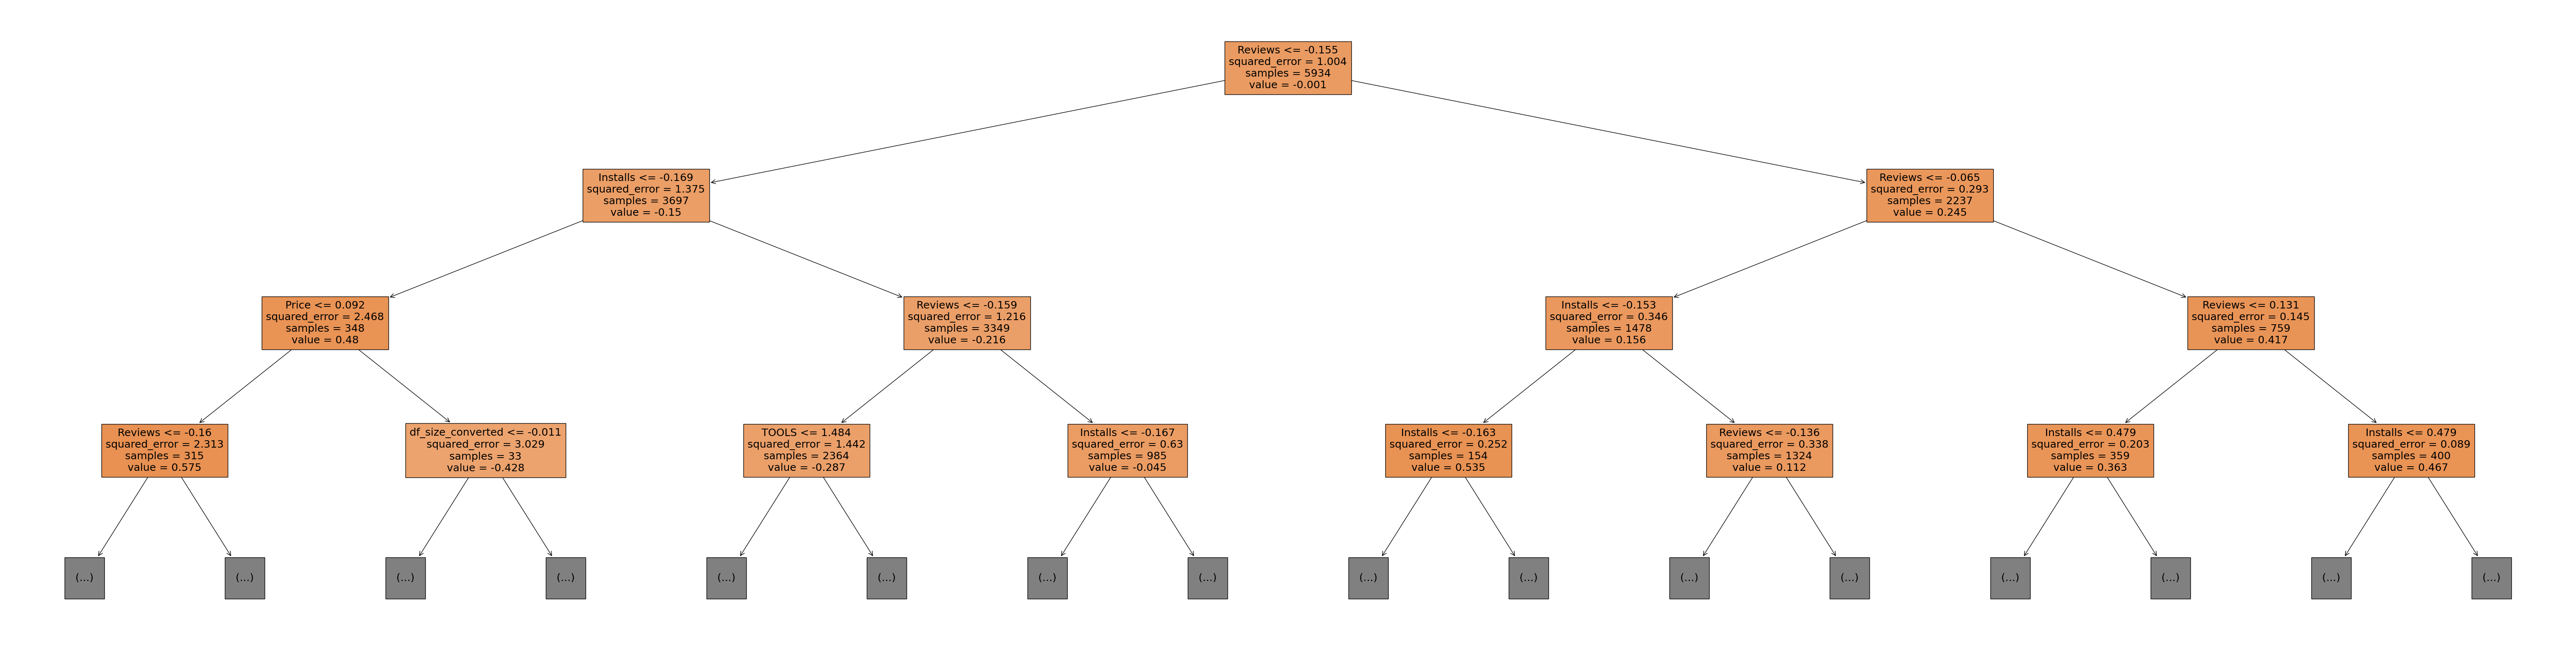

In [40]:
# Ploting Decision Tree For Max_depth =3.
plt.figure(figsize=(80,20))
plot_tree(model_1,feature_names=x_train.columns,filled=True,max_depth=3)
plt.show()

In [41]:
# Prediction for Full model
prediction=model_1.predict(x_test)
score=mean_squared_error(y_test,prediction)
score

1.4479775739992866

We must examine the model's overfitting.


In [42]:
# Maximum Depth of full model
model_1.tree_.max_depth

43

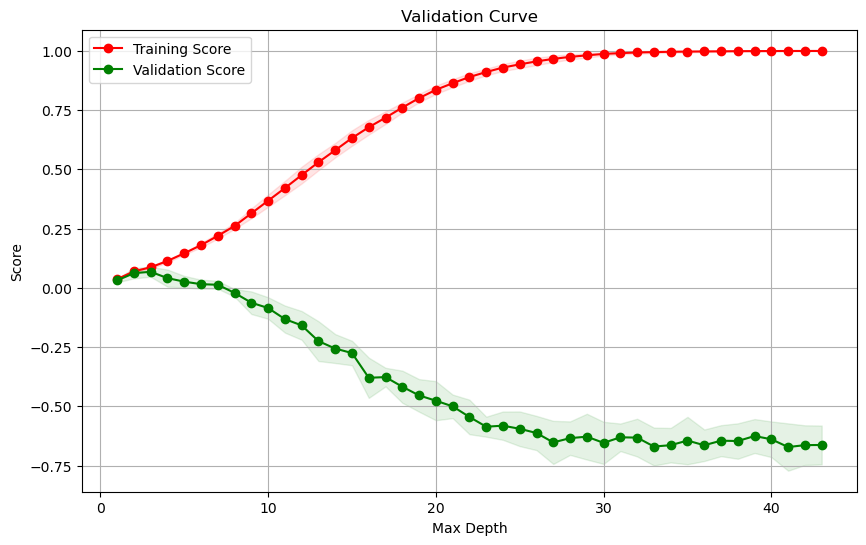

In [43]:
# Let's check the appropriate value for maximum depth
train_score, validation_score = validation_curve(DecisionTreeRegressor(),x_train,y_train,param_name="max_depth",param_range=range(1,44))

mean_train_score=np.mean(train_score,axis=1)
std_train=np.std(train_score,axis=1)
mean_validation=np.mean(validation_score,axis=1)
std_validation=np.std(validation_score,axis=1)


plt.figure(figsize=(10,6))
plt.title("Validation Curve")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.grid()

plt.plot(range(1,44),mean_train_score,"o-",color="r",label="Training Score")
plt.plot(range(1,44),mean_validation,"o-",color="g",label="Validation Score")
plt.fill_between(range(1,44),mean_train_score-std_train,mean_train_score + std_train, color="r", alpha=0.1)
plt.fill_between(range(1,44),mean_validation - std_validation, mean_validation + std_validation, color="g",alpha=0.1)

plt.legend(loc="best")
plt.show()

We can see from the validation curve above that max_depth = 3 is appropriate.


In [44]:
for max_dep in range(1,44):
  model=DecisionTreeRegressor(max_depth=max_dep,random_state=7)
  model.fit(x_train,y_train)
  prediction_train=model.predict(x_train)
  prediction=model.predict(x_test)
  print("Training score of max_depth {} is".format(max_dep),mean_squared_error(y_train,prediction_train))
  print("Prediction Score of max_depth {} is".format(max_dep), mean_squared_error(y_test,prediction))
  print(" ")

Training score of max_depth 1 is 0.9670608510776172
Prediction Score of max_depth 1 is 0.946877347313402
 
Training score of max_depth 2 is 0.9355703197360623
Prediction Score of max_depth 2 is 0.9200928541973646
 
Training score of max_depth 3 is 0.9191314159105987
Prediction Score of max_depth 3 is 0.9096435230027907
 
Training score of max_depth 4 is 0.8963490667347562
Prediction Score of max_depth 4 is 0.8974518689117046
 
Training score of max_depth 5 is 0.8664175761980941
Prediction Score of max_depth 5 is 0.8855452558332253
 
Training score of max_depth 6 is 0.8272645360446794
Prediction Score of max_depth 6 is 0.8802270379418982
 
Training score of max_depth 7 is 0.7865707428710065
Prediction Score of max_depth 7 is 0.906410101767449
 
Training score of max_depth 8 is 0.7404168034707562
Prediction Score of max_depth 8 is 0.9323071251703858
 
Training score of max_depth 9 is 0.6919521018967015
Prediction Score of max_depth 9 is 0.9665360648952608
 
Training score of max_depth 10

In [45]:
## Fit model for max_depth=3
model_2=DecisionTreeRegressor(max_depth=3,random_state=7)
model_2.fit(x_train,y_train)

prediction=model_2.predict(x_test)
score=mean_squared_error(y_test,prediction)
score

0.9096435230027907

# 6. Random Forest

In [46]:
# Fitting Random Forest Model
model_3 = RandomForestRegressor(n_estimators=150,max_depth=5,random_state=7,n_jobs= -1,max_features=None)
model_3.fit(x_train,y_train)

prediction= model_3.predict(x_test)
print(mean_squared_error(y_test,prediction))

0.8589029802334955


# 7. ANN

In [47]:
# Create Ann Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(38,),kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear',kernel_initializer='normal'))

model.compile(loss="mean_squared_error", optimizer="adam")

model.fit(x_train, y_train, epochs=10, batch_size=20)

predictions = model.predict(x_test)

class_predictions = np.round(predictions)


Epoch 1/10
297/297 [==============================] - 2s 2ms/step - loss: 0.9855
Epoch 2/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9688
Epoch 3/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9648
Epoch 4/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9636
Epoch 5/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9600
Epoch 6/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9566
Epoch 7/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9541
Epoch 8/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9534
Epoch 9/10
297/297 [==============================] - 1s 2ms/step - loss: 0.9503
Epoch 10/10
47/47 [==============================] - 0s 1ms/step


In [48]:
print(predictions)


[[-0.02502058]
 [-0.18696643]
 [ 0.17269053]
 ...
 [-0.17708856]
 [ 0.01413438]
 [-0.01461009]]


In [49]:
print(class_predictions)

[[-0.]
 [-0.]
 [ 0.]
 ...
 [-0.]
 [ 0.]
 [-0.]]


In [50]:
# Evaluation metrics of ANN model.
score=mean_squared_error(y_test,predictions)
score

0.9326371105083229

## HyperParameter Tunning for ANN.

The code below is used to tune Ann's hyperparameters. However, it takes too long to execute on my system. 


In [51]:
'''
def create_model(learning_rate, dropout_rate, activation_function, init, neuron1, neuron2):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=38, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init))

    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

model = KerasRegressor(build_fn=create_model, verbose=0)

batch_size = [20, 40]
epochs = [10, 50]
learning_rate = [0.001, 0.01]
dropout_rate = [0.1, 0.2]
activation_function = ['relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

param_grid = dict(batch_size=batch_size, epochs=epochs, learning_rate=learning_rate,
                  dropout_rate=dropout_rate, activation_function=activation_function,
                  init=init, neuron1=neuron1, neuron2=neuron2)

grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=10)
grid.fit(x_train, y_train)

print("Best :{}, using {}".format(grid.best_score_,grid.best_params_))
'''

'\ndef create_model(learning_rate, dropout_rate, activation_function, init, neuron1, neuron2):\n    model = Sequential()\n    model.add(Dense(neuron1, input_dim=38, kernel_initializer=init, activation=activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(neuron2, kernel_initializer=init, activation=activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(1, kernel_initializer=init))\n\n    model.compile(loss="mean_squared_error", optimizer="adam")\n    return model\n\nmodel = KerasRegressor(build_fn=create_model, verbose=0)\n\nbatch_size = [20, 40]\nepochs = [10, 50]\nlearning_rate = [0.001, 0.01]\ndropout_rate = [0.1, 0.2]\nactivation_function = [\'relu\', \'tanh\', \'linear\']\ninit = [\'uniform\', \'normal\', \'zero\']\nneuron1 = [4, 8, 16]\nneuron2 = [2, 4, 8]\n\nparam_grid = dict(batch_size=batch_size, epochs=epochs, learning_rate=learning_rate,\n                  dropout_rate=dropout_rate, activation_function=activation_function,

# Conclusion

In this Kaggle notebook, we embarked on a comprehensive analysis of the Google Play Store apps dataset. We explored the dataset, performed data preprocessing and feature engineering, and conducted various visualizations to gain insights into app categories, user ratings, and other relevant factors. Additionally, we built prediction models using Decision Tree, Random Forest, and Artificial Neural Networks (ANN) to predict app ratings based on different features.

Our analysis revealed several interesting findings:

1. **App Categories**: We observed that the "Family" and "Game" categories dominate the Google Play Store, followed by "Tools" and "Productivity."

2. **Ratings Distribution**: The majority of apps in the dataset had ratings between 4 and 5, indicating a generally positive user sentiment. However, there were some outliers with significantly lower ratings.

3. **Feature Importance**: Decision Tree and Random Forest models provided insights into the importance of various features in predicting app ratings. Factors such as the number of reviews, app size, and content rating emerged as key predictors.

4. **Prediction Performance**: We evaluated the prediction performance of our models using mean squared error (MSE). The Random Forest model outperformed the Decision Tree and ANN models, demonstrating superior predictive capabilities.

In conclusion, this Kaggle notebook provided a comprehensive analysis of the Google Play Store apps dataset, including insightful visualizations and predictive modeling. By understanding the underlying patterns and factors influencing app ratings, developers and stakeholders can make informed decisions to improve their app offerings and enhance user satisfaction.


# Thank You!
